In [1]:
import numpy as np
from scipy.io import loadmat  
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def load_to_df(filename):
    mat = loadmat(filename)
    mdata = mat['hs']  
    mdtype = mdata.dtype  
    ndata = {n: mdata[n][0, 0] for n in mdtype.names}

    emg = ndata['emg']
    eeg = ndata['eeg']
    emgsamplingrate = 4000
    eegsamplingrate = 500

    eegdata = eeg[0][0][1]
    eegcolumnnames = eeg[0][0][0][0]
    emgcolumnnames = emg[0][0][1][0]
    emgdata = emg[0][0][0]

    eegcolumns = []
    for element in eegcolumnnames:
        eegcolumns.append(element[0])

    emgcolumns = []
    for element in emgcolumnnames:
        emgcolumns.append(element[0])

    eegdf = pd.DataFrame(eegdata,columns=eegcolumns)
    emgdf = pd.DataFrame(emgdata,columns=emgcolumns)
    eegt = np.arange(0,eegdf.shape[0]/eegsamplingrate,1/eegsamplingrate)
    emgt = np.arange(0,emgdf.shape[0]/emgsamplingrate,1/emgsamplingrate)

    return eegdf, emgdf, eegt, emgt


In [3]:
def load_dfs_to_dict(participant, session):
    filename = 'HS_P' + str(participant) + '_S' + str(session) +'.mat'
    eegdf, emgdf, eegt, emgt = load_to_df(filename)
    list = [eegdf, emgdf, eegt, emgt]
    dictionary = {}
    attribute_list = ['eegdf','emgdf','eegt','emgt']
    for i, att in enumerate(attribute_list):
        dictionary[att] = list[i]

    return dictionary







In [4]:

def load_participants(firstp, lastp, firsts, lasts):
    data = {}
    for participant in range(firstp, lastp + 1):
        participantdict = {}
        for session in range(firsts, lasts + 1):
            participantdict['session ' + str(session)] = load_dfs_to_dict(participant,session)
        data['participant ' + str(participant)] = participantdict
    return data

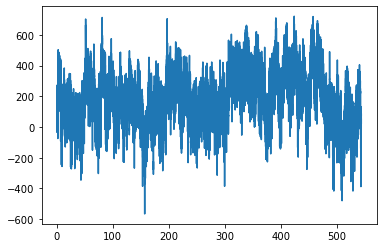

In [5]:
data = load_participants(1,2,2,4)
eegdf = data['participant 1']['session 2']['eegdf']
time = data['participant 1']['session 2']['eegt']
plt.plot(time,eegdf['Pz'])